# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# Or Bittoun : 1366
# Romi Yosef : 3274

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT  
Goal: Clarify technical concepts and verify syntax related to model comparison in scikit-learn  
Propmpt1: What does GridSearchCV do and how do I use it with RandomForest?  
    
Propmpt2: What's the difference between F1 Macro and F1?  
    
Propmpt3: What are the differences between Random Forest and KNN, and in what cases would Random Forest typically perform better?


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
This assignment deals with a supervised classification problem using the well-known Wine Recognition dataset from the UCI Machine Learning Repository.
The dataset contains the results of a chemical analysis of wines grown in the same region in Italy, originating from three different cultivars (classes 0, 1, and 2).
There are 13 numerical features for each wine sample, such as alcohol content, malic acid.
The goal is to build a machine learning model that learns to classify wines into one of the three classes based on these chemical properties. 
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

train_df = pd.read_csv('C:/Users/orbit_24ts2or/Desktop/wine_train.csv')
test_df = pd.read_csv('C:/Users/orbit_24ts2or/Desktop/wine_test.csv')


print("Train Set:")
display(train_df.head())

print("\nTest Set:")
display(test_df.head())




Train Set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2



Test Set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


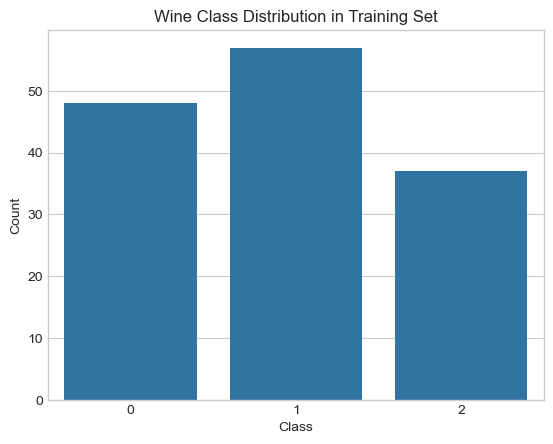

In [3]:
sns.countplot(x='target', data=train_df)
plt.title('Wine Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


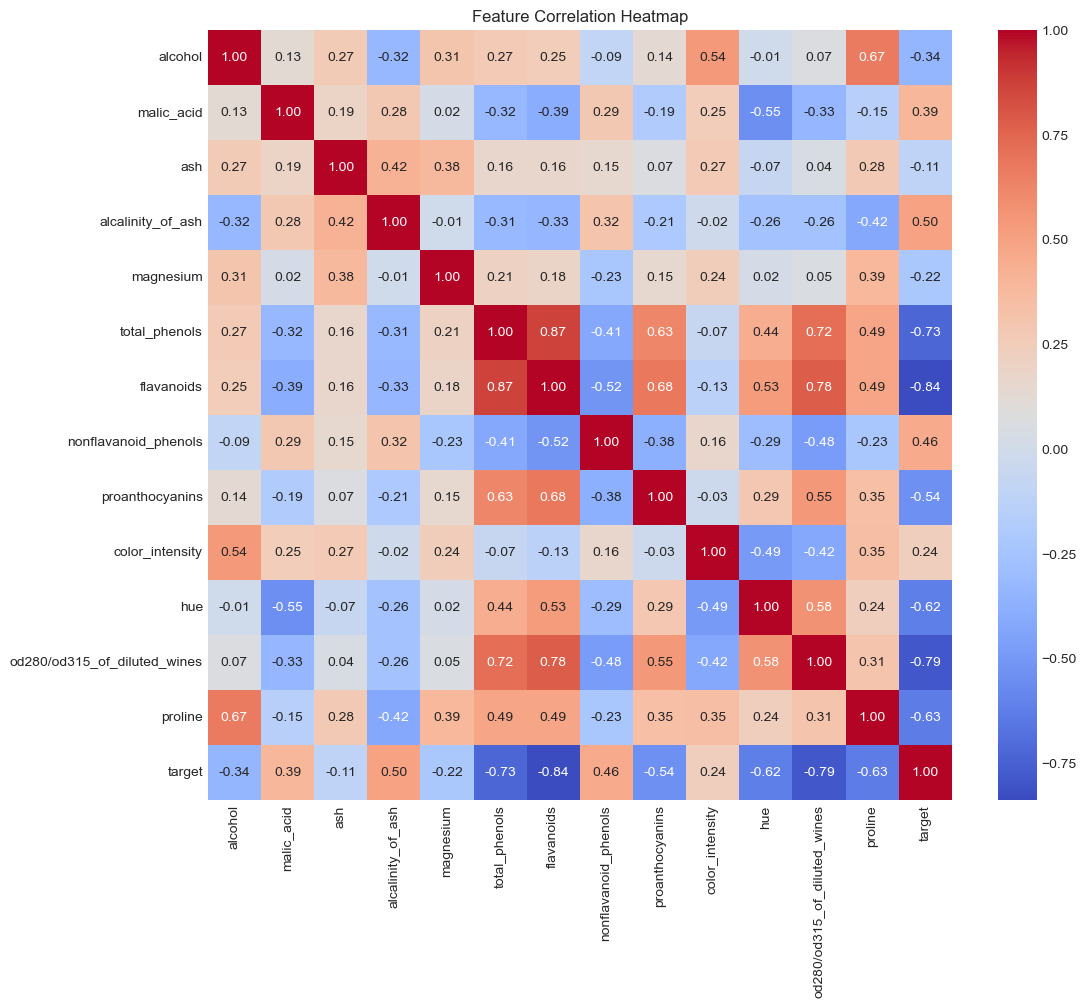

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


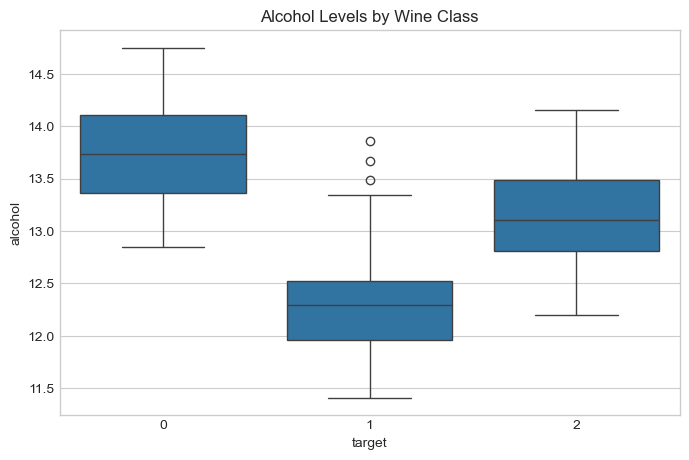

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='alcohol', data=train_df)
plt.title("Alcohol Levels by Wine Class")
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [6]:
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train)

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)

results_df = pd.DataFrame({
    'Model': ['Random Forest', 'KNN'],
    'Best Params': [grid_rf.best_params_, grid_knn.best_params_],
    'Best F1 Macro': [grid_rf.best_score_, grid_knn.best_score_]
})

results_df


,Model,Best Params,Best F1 Macro
0,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.978701
1,KNN,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.964384


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [9]:

best_model = grid_rf if grid_rf.best_score_ >= grid_knn.best_score_ else grid_knn
print("Selected Model:", (best_model.best_estimator_))
print("Best Parameters:", best_model.best_params_)
best_model_final = best_model.best_estimator_
best_model_final.fit(X_train_scaled, y_train)





Selected Model: RandomForestClassifier(n_estimators=50, random_state=42)
Best Parameters: {'max_depth': None, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50, random_state=42)

## Part 5 - Apply on test and show model performance estimation

First 5 Predictions: [2 0 2 1 2]
First 5 Actual: [2 0 2 1 2]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

F1 Macro Score on Test Set: 0.9731615673644658


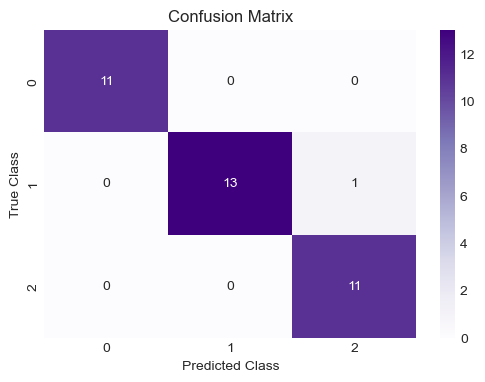

In [10]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model_final = best_model.best_estimator_
best_model_final.fit(X_train_scaled, y_train)

y_pred = best_model_final.predict(X_test_scaled)

print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual:", y_test[:5].values)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Macro Score on Test Set:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()




Conclusion: 

In this project, we developed a supervised learning classification pipeline using the Wine dataset.
After initial exploration and feature analysis, we applied standard scaling to normalize all feature values.

We experimented with two models: Random Forest and KNN, using GridSearchCV and 5-fold cross-validation to evaluate different hyperparameter combinations.
Random Forest outperformed KNN with a higher F1 Macro score on both validation and test sets.

The final selected model was a Random Forest classifier with optimized parameters.
It achieved strong performance across all three classes, as reflected in the classification report and confusion matrix.